# Programming With Python for Data Science(EDX DAT210X)

<h3>1. Features Premiere</h3>

To be usable by SciKit-Learn, the machine learning library for Python you'll be using in this course, your data needs to be organized into matrix of samples and features.

Samples: Rows in a dataset. (Quantitative traits)<br>
Features: Columns in a dataset. Can be numeric/textual. (Quantitative traits that describe samplesb)

Types of Features: <br>
1. Continuous(like speed, distance, range, etc)
2. Categorical
    2.1 Ordinal (High, Medium, Low, etc)
    2.2 Nominal (Colors, Car Models, TV Shows, etc)
    

<h3>2. Manipulating Data</h3>

<b>Loading Data</b>: Once you've collected your data, the next step is learning how to manipulate it efficiently. 

Pandas is one of the most vital and actively developed high-performance data analysis libraries for Python, and you'll be using it for all your data input, output, and manipulation needs.<br>

<b>import pandas as pd<b>

There are two data structures in Pandas you need to know how to work with - <br>
1. Series (object) -  A one-dimensional, labeled array that represents a single column in your dataset.
2. DataFrame (object) - A collection of series (or Columns).

To manipulate a dataset, you first need to load it into a dataframe. Different people prefer alternative methods of storing their data, so Pandas makes loading data easy no matter how it's stored. Here are some popular methods for loading data:

<b>Note the return type of .read_html(), it is a Python list of dataframes, one per HTML table found on the webpage</b>

Also make sure you understand fully what each of the following parameters do by checking the documentation:
<ol>
        <li>Sep - Separator: print('apple', 'orange', 'mango', sep = '_'))</li>
         <li>delimeter - Defines a Boundary. Eg. Python's String class has a method called split() which takes a delimiter as optional argument. Default delimiter for it is whitespace. 'aa-ab-ca'.split('-')</li>
         <li>header - column headers</li>
         <li>names - columns</li>
         <li>index_col - row</li>
         <li>skipinitialspace - to strip out the whitespace from each field name</li>
         <li>skiprows - skip row with specified index</li>
</ol>
         
     

Writing an existing dataframe back to disk is just as straightforward as reading from one:

Therefore if your data starts from the first line and you don't actually have a header row, ensure you pass in the names parameter (a list of column header name strings) when you call any .read_*() method. Pandas will use the provided headers in place of your first data record.

If you do have column titles already defined in your dataset but wish to rename them, in that case, use the writeable .columns property:

my_dataframe.columns = ['new', 'column', 'header', 'labels']

<h4>Feature Reperesentation:</h4>

<h6>Textual Categorical-Features:</h6> 

(1) Ordinal -  In the case of ordinals, you should create a mapping of increasing integers to each possible unique value of the feature. Any entries not found in your designated categories list will be mapped to -1:

In [8]:
ordered_satisfaction = ['Very Unhappy', 'Unhappy', 'Neutral', 'Happy', 'Very Happy']
df = pd.DataFrame({'satisfaction':['Mad', 'Happy', 'Unhappy', 'Neutral']})
df.satisfaction = df.satisfaction.astype("category",
  ordered=True,
  categories=ordered_satisfaction
).cat.codes
df

,satisfaction
0,-1
1,3
2,1
3,2


 (2) Nominal - On the other hand, if your feature is nominal and therefore lacking any inherent numeric ordering, then you have two options. The first is you can encoded the fature similar as you did above. This would be a fast-and-dirty approach. While you're just getting accustomed to your dataset and taking it for its first run through your data analysis pipeline, this method might be the most convenient:

In [11]:
df = pd.DataFrame({'vertebrates':[
...  'Bird',
...  'Bird',
...  'Mammal',
...  'Fish',
...  'Amphibian',
...  'Reptile',
...  'Mammal',
... ]})

# Method 1)
df['vertebrates'] = df.vertebrates.astype("category").cat.codes
df

,vertebrates
0,1
1,1
2,3
3,2
4,0
5,4
6,3


In [12]:
# Method 2)
df = pd.get_dummies(df,columns=['vertebrates'])
df

,vertebrates_0,vertebrates_1,vertebrates_2,vertebrates_3,vertebrates_4
0,0,1,0,0,0
1,0,1,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,1,0,0,0,0
5,0,0,0,0,1
6,0,0,0,1,0


<h6>Pure Textual Features</h6>

If you are trying to "featurize" a body of text such as a webpage, a tweet, a passage from a newspaper, an entire book, or a PDF document, creating a corpus of words and counting their frequency is an extremely powerful encoding tool. This is also known as the Bag of Words model, implemented with the CountVectorizer() method in SciKit-Learn. Even though the grammar of your sentences and their word-order are completely discarded, this model has accomplished some pretty amazing things, such as being able to correctly identifying J.K. Rowling's writing from a blind line up of authors:

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [ "Authman ran faster than Harry because he is an athlete.",  "Authman and Harry ran faster and faster.", ]
bow = CountVectorizer()
X = bow.fit_transform(corpus) # Sparse Matrix
bow.get_feature_names()

['an',
 'and',
 'athlete',
 'authman',
 'because',
 'faster',
 'harry',
 'he',
 'is',
 'ran',
 'than']

In [17]:
X.toarray()

array([[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0]], dtype=int64)

<h6>Graphical Features</h6>

In addition to text and natural language processing, bag of words has successfully been applied to images by categorizing a collection of regions and describing only their appearance, ignoring any spatial structure. However this is not the typical approach used to get images represent as features, and requires you come up with methods of categorizing image regions. More regularly used methods include:

Split the image into a grid of smaller areas, and attempt feature extraction at each locality. Return a combined array of all discovered features.
Use variable-length gradients and other transformations as the features, such as regions of high / low luminosity, histogram counts for horizontal and vertical black pixels, stroke and edge detection, etc.
Resize the picture to a fixed size, convert it to grayscale, then encode every pixel as an element in a single-dimensional feature array.
Let's explore how you might go about coding up the third method:

<h6>Audio Features</h6>

Audio can be encoded with similar methods as graphical features, with the caveat that your 'audio-image' is already a one-dimensional waveform data type instead of a two-dimensional array of pixels. Rather than looking for graphical attributes, you would look for auditory ones, such as the length of sounds, power and noise ratios, and histogram counts after applying filters.

<h4>Wrangling</h4>

<h4>Visualizations</h4>

<h6>Histograms</h6>

Histograms are one of the The Seven Basic Tools of Quality, graphical techniques which have been identified as being most helpful for troubleshooting issues. 

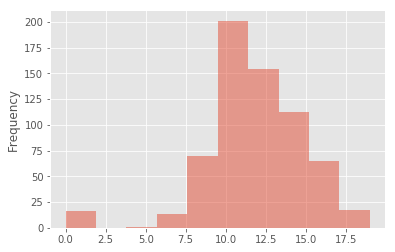

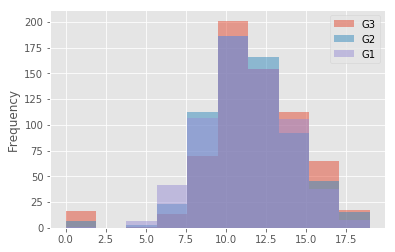

In [47]:
%matplotlib inline
import pandas as pd
#%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Look Pretty
# If the above line throws an error, use plt.style.use('ggplot') instead
	
student_dataset = pd.read_csv("C:\\Users\\Akshay\\Desktop\\PyFinance\\DAT210x\\DAT210x-master\\Module3\\Datasets\\students.data", index_col=0)
	
my_series = student_dataset.G3
my_dataframe = student_dataset[['G3', 'G2', 'G1']] 
	
my_series.plot.hist(alpha=0.5)
my_dataframe.plot.hist(alpha=0.5)

<h6>2D Scatter Plots</h6>

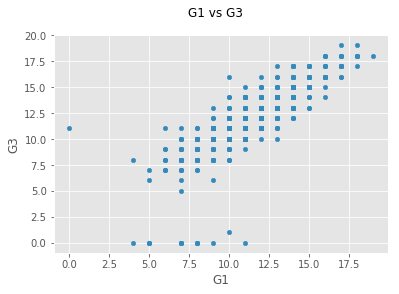

In [48]:
student_dataset.plot.scatter(x='G1', y='G3')
plt.suptitle('G1 vs G3')
plt.xlabel('G1')
plt.ylabel('G3')

<h6> 3D Scatter Plots </h6>

To follow up from the last section, there surely is a way to visualize the relationship between three variables simultaneously. That way is through 3D scatter plots. Unfortunately, the Pyplot member of Pandas dataframes don't natively support the ability to generate 3D plots... so for the sake of your visualization repertoire, you're going to learn how to make them directly with MatPlotLib.

<IPython.core.display.Javascript object>


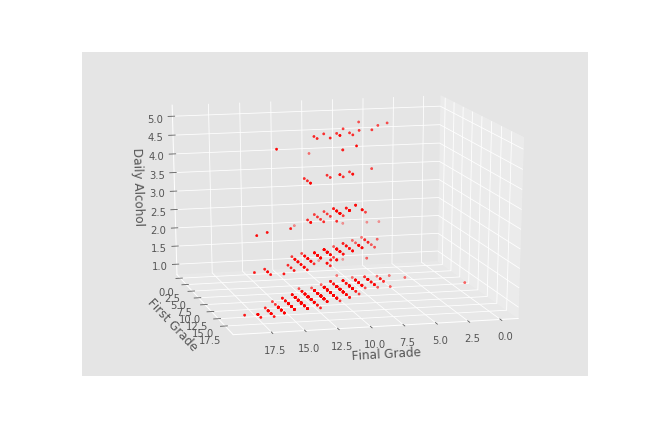

In [52]:

# %matplotlib inline
#%matplotlib gtk
%matplotlib notebook
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Final Grade')
ax.set_ylabel('First Grade')
ax.set_zlabel('Daily Alcohol')
	
ax.scatter(student_dataset.G1, student_dataset.G3, student_dataset['Dalc'], c='r', marker='.')
plt.show()

<h6>Higher Dimensionality Visualizations</h6>

Parallel Coordinates : Parallel coordinate plots are similar to scatter plots in that each axis maps to the ordered, numeric domain of a feature. But instead of having axes aligned in an orthogonal manner, parallel coordinates get their name due to their axes being arranged vertically and in parallel. All that is just a fancy way of saying parallel coordinates are a bunch of parallel, labeled, numeric axes.

Each graphed observation is plotted as a polyline, a series of connected line segments. The joints of the polyline fall on each axis. Since each axis maps to the domain of a numeric feature, the resulting polyline fully describes the value of each of the observation's features.

<IPython.core.display.Javascript object>


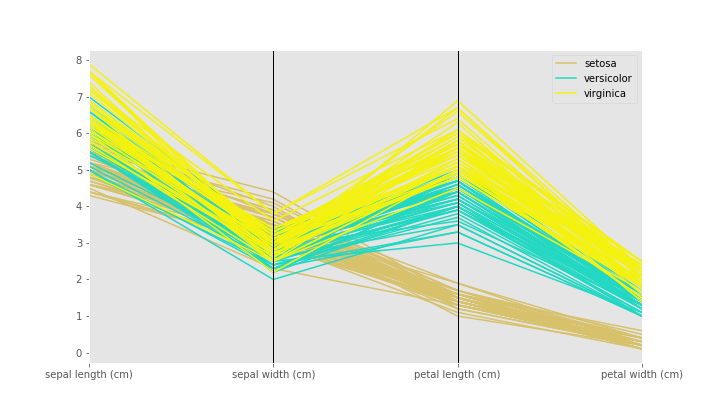

In [57]:
from sklearn.datasets import load_iris
from pandas.plotting import parallel_coordinates, andrews_curves
%matplotlib notebook
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
	
# Look pretty...
matplotlib.style.use('ggplot')
# If the above line throws an error, use plt.style.use('ggplot') instead
	
# Load up SKLearn's Iris Dataset into a Pandas Dataframe
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names) 
	
df['target_names'] = [data.target_names[i] for i in data.target]
	
# Parallel Coordinates Start Here:
plt.figure()
parallel_coordinates(df, 'target_names')
plt.show()

<h6> Andrew's Curves'</h6>

<IPython.core.display.Javascript object>


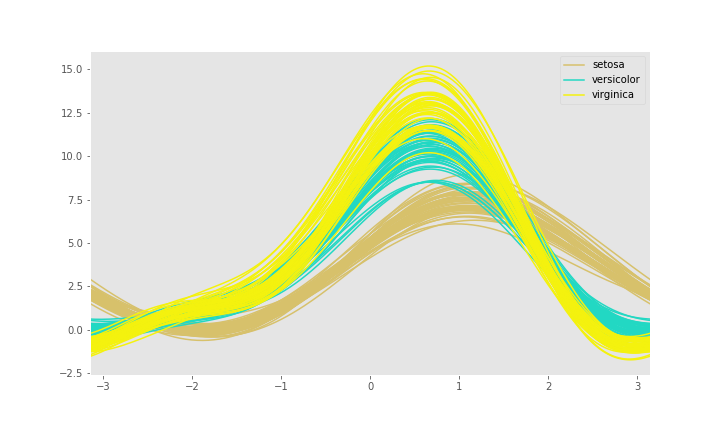

In [58]:
# Andrews Curves Start Here:
plt.figure()
andrews_curves(df, 'target_names')
plt.show()

<h6>imshow</h6>

One last higher dimensionality, visualization-technique you should know how to use is MatPlotLib's .imshow() method. This command generates an image based off of the normalized values stored in a matrix, or rectangular array of float64s. The properties of the generated image will depend on the dimensions and contents of the array passed in:

In [61]:
import numpy as np
df = pd.DataFrame(np.random.randn(1000, 5), columns=['a', 'b', 'c', 'd', 'e'])
df.corr()

,a,b,c,d,e
a,1.000000,0.020207,-0.023733,0.004570,-0.047132
b,0.020207,1.000000,-0.033839,-0.025102,-0.016860
c,-0.023733,-0.033839,1.000000,-0.021825,0.035120
d,0.004570,-0.025102,-0.021825,1.000000,0.058878
e,-0.047132,-0.016860,0.035120,0.058878,1.000000


<IPython.core.display.Javascript object>


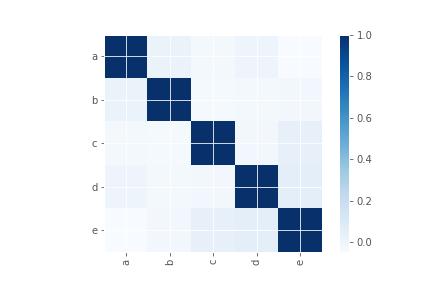

In [62]:
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
	
plt.show()